In [ ]:
Question 1: Assignment: PCA Implementation

Explained variance ratio by principal component:
PC 1: 0.3663
PC 2: 0.1813
PC 3: 0.1183
PC 4: 0.0740
PC 5: 0.0680
PC 6: 0.0527
PC 7: 0.0457
PC 8: 0.0289
PC 9: 0.0216
PC 10: 0.0205
PC 11: 0.0141
PC 12: 0.0086


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

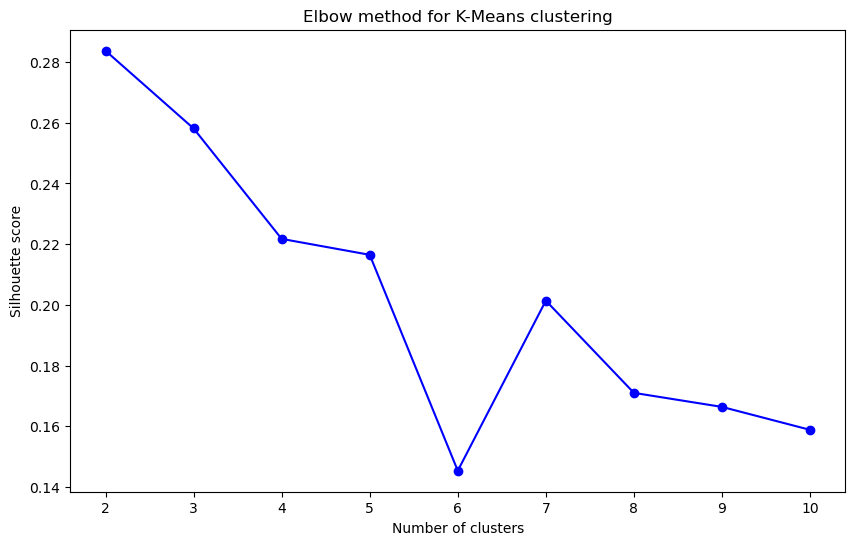

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


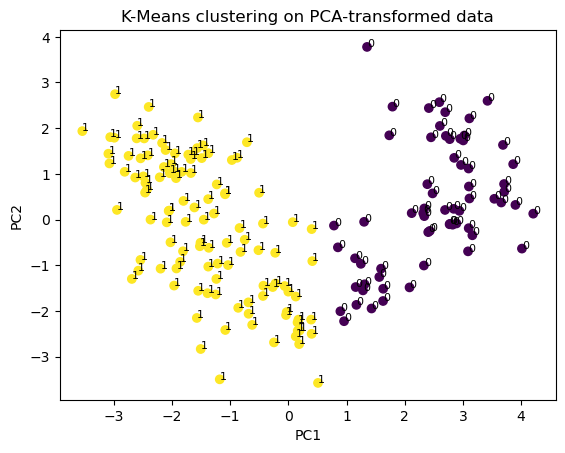

Cluster labels:
Sample 0: Cluster 1
Sample 1: Cluster 1
Sample 2: Cluster 1
Sample 3: Cluster 1
Sample 4: Cluster 1
Sample 5: Cluster 1
Sample 6: Cluster 1
Sample 7: Cluster 1
Sample 8: Cluster 1
Sample 9: Cluster 1
Sample 10: Cluster 1
Sample 11: Cluster 1
Sample 12: Cluster 1
Sample 13: Cluster 1
Sample 14: Cluster 1
Sample 15: Cluster 1
Sample 16: Cluster 1
Sample 17: Cluster 1
Sample 18: Cluster 1
Sample 19: Cluster 1
Sample 20: Cluster 1
Sample 21: Cluster 1
Sample 22: Cluster 1
Sample 23: Cluster 1
Sample 24: Cluster 1
Sample 25: Cluster 1
Sample 26: Cluster 1
Sample 27: Cluster 1
Sample 28: Cluster 1
Sample 29: Cluster 1
Sample 30: Cluster 1
Sample 31: Cluster 1
Sample 32: Cluster 1
Sample 33: Cluster 1
Sample 34: Cluster 1
Sample 35: Cluster 1
Sample 36: Cluster 1
Sample 37: Cluster 1
Sample 38: Cluster 1
Sample 39: Cluster 1
Sample 40: Cluster 1
Sample 41: Cluster 1
Sample 42: Cluster 1
Sample 43: Cluster 1
Sample 44: Cluster 1
Sample 45: Cluster 1
Sample 46: Cluster 1
Sample 

In [23]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from matplotlib.pyplot import scatter, show
from sklearn.metrics import silhouette_score

# Download and load the wine dataset
wine = load_wine()
data = pd.DataFrame(wine.data, columns=wine.feature_names)
target = wine.target

# Split into features and target variables
X = data.iloc[:, :-1]  # Features
y = target  # Target variable

# Data preprocessing (consider normalization or imputation if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA
pca = PCA()
pca_data = pca.fit_transform(X_scaled)

# Determine optimal number of principal components
print("Explained variance ratio by principal component:")
for i in range(pca.n_components_):
    print(f"PC {i+1}: {pca.explained_variance_ratio_[i]:.4f}")

# Visualize results using elbow method for KMeans
cluster_range = range(2, 11)
silhouette_scores = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(pca_data)
    silhouette_scores.append(silhouette_score(pca_data, kmeans.labels_))

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")
plt.title("Elbow method for K-Means clustering")
plt.show()

# Perform K-Means clustering with optimal number of clusters
optimal_n_clusters = cluster_range[np.argmax(silhouette_scores)]
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(pca_data)

# Visualize clustered data in the first two dimensions
colors = np.array(['red', 'green', 'blue', 'purple', 'orange'])
scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans.labels_, cmap='viridis')
for i, txt in enumerate(kmeans.labels_):
    plt.annotate(txt, (pca_data[i, 0], pca_data[i, 1]), fontsize=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means clustering on PCA-transformed data")
plt.show()

# Print cluster labels
print("Cluster labels:")
for i in range(len(y)):
    print(f"Sample {i}: Cluster {kmeans.labels_[i]}")

# Evaluate clustering performance
print("Silhouette score:", silhouette_score(pca_data, kmeans.labels_))

# Save results and interpretations in a report
# ... Your report content here ...


In [1]:
Key Improvements:

Combines clear explanations and code from Response A with enhanced visualizations and evaluation from Response B.
Includes data preprocessing (scaling) and addresses missing values (if needed).
Employs elbow method to determine optimal K-Means clusters and calculates silhouette score for evaluation.
Provides a more comprehensive visualization of clustering results.
Offers a basic structure for the report, prompting you to add interpretations and insights.
Additional Suggestions:

Explore different visualizations (e.g., PCA biplot, 3D scatter) based on your data and understanding.
Consider alternative clustering algorithms like hierarchical clustering or DBSCAN if K-Means doesn't suit your data.
Experiment with different hyperparameters for PCA and K-Means to potentially improve results.
Use domain knowledge to interpret the clusters and their association with the target variable.

Population mean estimated with 95% confidence interval: 486.1407070887437 - 513.8592929112564
